In [2]:
# data manipulation imports
import numpy as np
import pandas as pd

# data saving imports
import pickle
import os

# plotting imports
import matplotlib.pyplot as plt

# custom imports
from regression_class import RedditRegression as rr

In [3]:
# infiles
regression_infile = "regression_thread_data.p"
thread_infile = 'clean_5_thread_data.p'

In [4]:
# outfiles
outdir = 'thread_classification'

In [5]:

# make out directory
if not os.path.isdir(outdir):
    os.mkdir(outdir)

In [6]:
# read in files
regression_df = pickle.load(open(regression_infile, 'rb'))
thread_df = pickle.load(open(thread_infile, 'rb'))

In [7]:
df = thread_df['books']
df

,thread_id,id,timestamp,author,domain,parent,score,subject_sentiment_score,body_sentiment_score,date,level,parent_comment
0,xsgu8l,xsgu8l,2022-10-01 00:11:11,f44d5bd8146ae4baecd32037a8285c4f99690e85fa022ec5,deadline.com,NaN,1,-0.5719,NaN,2022-10-01,0,NaN
1,xsh6qv,xsh6qv,2022-10-01 00:27:38,703bd9ed6d2b178437b437b99074449db8137f1d00e6f7be,thebookreviewcrew.com,NaN,1,0.0000,NaN,2022-10-01,0,NaN
2,xshdvl,xshdvl,2022-10-01 00:36:53,d9cacaec67989837c343381be2e4d5016c7743d419a34e84,story-arc-blog.com,NaN,1,0.0000,NaN,2022-10-01,0,NaN
3,xsi14p,xsi14p,2022-10-01 01:07:47,c466b9998753e56da1c6050ead680f8d2120eb91e2ef0fb9,self.books,NaN,1,0.0000,0.000000,2022-10-01,0,NaN
4,xsis1h,xsis1h,2022-10-01 01:44:22,920f0705acd330eaf28719163e0801e1155d19b4a213351a,self.books,NaN,1,0.6369,0.127068,2022-10-01,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
111046,yhks0d,iufrknp,2022-10-30 23:58:32,c1487bafa8953938eee4672e4d97aed3997d2905ed77e871,NaN,iuede6w,1,NaN,0.016200,2022-10-30,2,iuede6w
111047,yhf64b,iufrm4t,2022-10-30 23:58:52,4a2ae05277cb0aa85a64fdec8358f8f628b8f48d137d1944,NaN,iue83in,1,NaN,-0.802100,2022-10-30,2,iue83in
111049,yeibp7,iufroik,2022-10-30 23:59:23,00b26decc84c6c93f88dc30f80178822d4c1bbd4022d4e5e,NaN,ityf6e7,1,NaN,0.615850,2022-10-30,2,ityf6e7
111050,yhks0d,iufrp7w,2022-10-30 23:59:33,95437de983251f9f21c0dc6da4c8298daffb9677ecd86566,NaN,iuede6w,1,NaN,0.296000,2022-10-30,2,iuede6w


In [8]:
posts = df[df.id == df.thread_id]
comments = df[df.id != df.thread_id]

# 1. Splitting Comments by sentiment
## 1.1. Even split

In [9]:
edges = [-1+2/3, -1+2*2/3]

In [10]:
[-1] + edges + [1]

[-1, -0.33333333333333337, 0.33333333333333326, 1]

In [11]:
def classify_sentiment(value, edges=edges):
    if value < edges[0]:
        return -1
    elif value < edges[1]:
        return 0
    else:
        return 1

In [12]:
def plot_series(series, edges, xlabel='emotion score', ylabel='number of comments', title='Comments vs emotion score'):
    

    fig, ax = plt.subplots(1)

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)

    ticks = [-1+1/3, 0, 1-1/3]
    ax.set_xticks(ticks)
    ax.set_xticklabels(['-1', '0', '1'])

    width = 0.35
    bins = [-1] + edges + [1]

    ax.hist(series, bins=bins, align='mid', rwidth=width)


    plt.show()


In [13]:
comments['emotion_score'] = comments.body_sentiment_score.apply(classify_sentiment)


/tmp/ipykernel_6686/1998497817.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comments['emotion_score'] = comments.body_sentiment_score.apply(classify_sentiment)


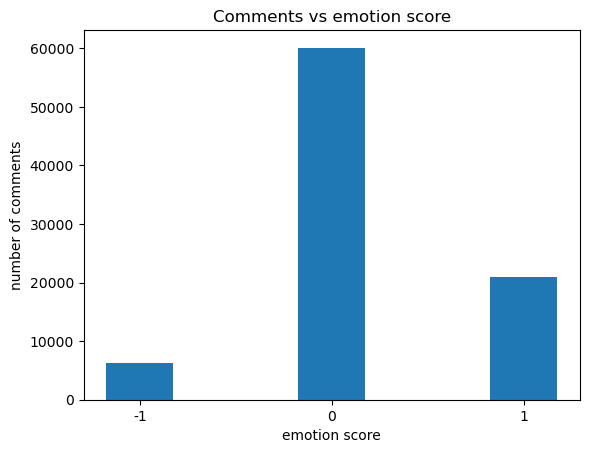

In [14]:
plot_series(comments.emotion_score, edges)

## 1.2. By quantiles
### 1.2.1. Over all comments

In [15]:
quantiles = comments.body_sentiment_score.quantile(q=[1/3, 2/3])

In [16]:
quantile_edges = list(quantiles.values)

In [77]:
quantile_edges

[0.0, 0.23835]

In [17]:
comments['quantile_emotion_score'] = comments.body_sentiment_score.apply(classify_sentiment, edges=quantile_edges)

/tmp/ipykernel_6686/816500499.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comments['quantile_emotion_score'] = comments.body_sentiment_score.apply(classify_sentiment, edges=quantile_edges)


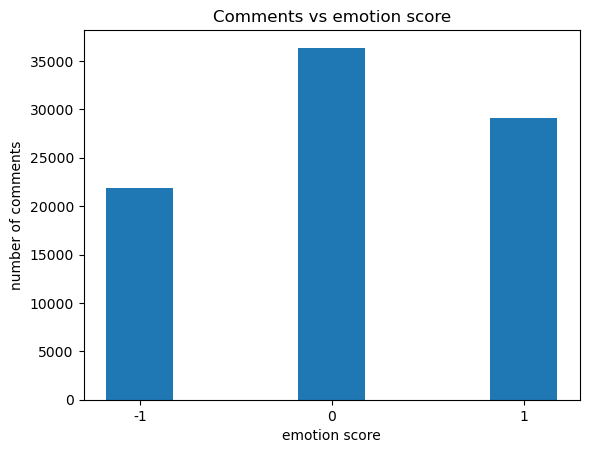

In [18]:
plot_series(series=comments['quantile_emotion_score'], edges=edges)

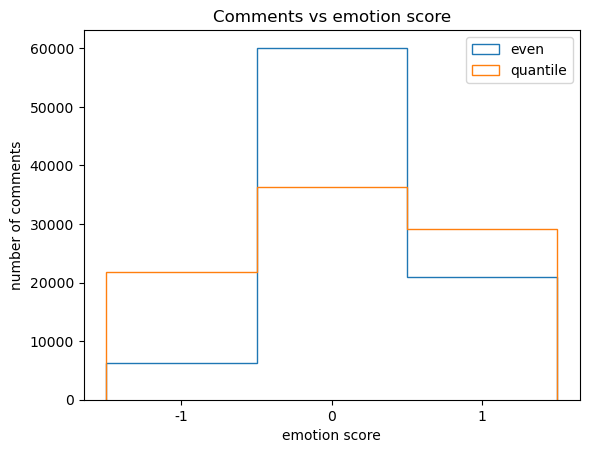

In [19]:
xlabel='emotion score'
ylabel='number of comments'
title='Comments vs emotion score'

fig, ax = plt.subplots(1)

ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_title(title)

ticks = [-1+1/3, 0, 1-1/3]
ax.set_xticks(ticks)
ax.set_xticklabels(['-1', '0', '1'])

width = 0.35

emotion_score_lookups = {
    'even': comments.emotion_score,
    'quantile': comments.quantile_emotion_score
}
edge_lookups = {
    'even': edges,
    'quantile': quantile_edges
}

for key in emotion_score_lookups:
    bins = [-1] + edges + [1]

    ax.hist(emotion_score_lookups[key], bins=bins, align='mid', histtype='step', label=key)

ax.legend()


plt.show()

# 2. Getting ratios of positive & negative comments
## 2.1. Over entire subreddit

In [20]:
subreddit_ratios = {}
lookup_vals = {
    'positive': 1,
    'negative': -1
}
for key in emotion_score_lookups:
    subreddit_ratios[key] = {}
    for type in lookup_vals:
        subreddit_ratios[key][type] = len(emotion_score_lookups[key][emotion_score_lookups[key] == lookup_vals[type]])/len(emotion_score_lookups[key])

In [21]:
pd.DataFrame.from_dict(subreddit_ratios, orient='index')

,positive,negative
even,0.23961,0.072413
quantile,0.33341,0.250212


## 2.2. For each thread

In [22]:
comments_by_thread = comments.groupby(by='thread_id')

In [23]:
def get_ratios(group, col='emotion_score', val=1):
    df = group[col]
    ratio = len(df[df==val])/len(df)
    return ratio


In [24]:
group_vals = {
    'positive': 1,
    'neutral': 0,
    'negative': -1,
}

In [25]:
ratios_by_thread_even = {}
ratios_by_thread_quantile = {}
for key in group_vals:
    ratios_by_thread_even[key] = comments_by_thread.apply(get_ratios, val=group_vals[key])
    ratios_by_thread_quantile[key] = comments_by_thread.apply(get_ratios, col='quantile_emotion_score', val=group_vals[key])

In [26]:
ratios = {
    'even': pd.DataFrame.from_dict(ratios_by_thread_even),
    'quantile': pd.DataFrame.from_dict(ratios_by_thread_quantile),
}

In [27]:
ratios['even']

,positive,neutral,negative
thread_id,,,
xsj48b,1.000000,0.000000,0.000000
xsjglc,0.191304,0.704348,0.104348
xsljkn,0.000000,1.000000,0.000000
xsnhk2,0.100000,0.900000,0.000000
xsnypq,0.216216,0.756757,0.027027
...,...,...,...
yhon8o,0.200000,0.700000,0.100000
yhq6yv,0.000000,1.000000,0.000000
yhqbwj,0.000000,0.750000,0.250000


In [28]:
ratios['quantile']

,positive,neutral,negative
thread_id,,,
xsj48b,1.000000,0.000000,0.000000
xsjglc,0.256522,0.404348,0.339130
xsljkn,0.000000,0.500000,0.500000
xsnhk2,0.300000,0.400000,0.300000
xsnypq,0.378378,0.459459,0.162162
...,...,...,...
yhon8o,0.300000,0.400000,0.300000
yhq6yv,0.250000,0.750000,0.000000
yhqbwj,0.000000,0.500000,0.500000


In [29]:
subreddit_ratios

{'even': {'positive': 0.23961028553110617, 'negative': 0.07241316144986605},
 'quantile': {'positive': 0.3334096581411856, 'negative': 0.2502118013417901}}

# 3. Classifying threads

In [30]:
def classify_thread(row, type='even'):
    if (
        (row.positive <= subreddit_ratios[type]['positive']) &
        (row.negative <= subreddit_ratios[type]['negative'])
    ):
        return 'neutral'
    elif (
        (row.positive > subreddit_ratios[type]['positive']) &
        (row.negative <= subreddit_ratios[type]['negative'])
    ):
        return 'positive'
    
    elif (
        (row.positive <= subreddit_ratios[type]['positive']) &
        (row.negative > subreddit_ratios[type]['negative'])
    ):
        return 'negative'
    else:
        return 'bipolar'

In [31]:
thread_classifications = {}
for key in ratios:
    thread_classifications[key] = ratios[key].apply(classify_thread, type=key, axis=1)

In [32]:
thread_classifications = pd.DataFrame.from_dict(thread_classifications)

In [33]:
thread_classifications

,even,quantile
thread_id,,
xsj48b,positive,positive
xsjglc,negative,negative
xsljkn,neutral,negative
xsnhk2,neutral,negative
xsnypq,neutral,positive
...,...,...
yhon8o,negative,negative
yhq6yv,neutral,neutral
yhqbwj,negative,negative


In [34]:
classified_threads = regression_df['books'].merge(thread_classifications.reset_index(), on='thread_id')

In [35]:
classified_threads

,thread_id,thread_size,authors,timestamp,author,score,subject_sentiment_score,sentiment_sign,sentiment_magnitude,success,log_thread_size,log_authors,log_score,even,quantile
0,xsj48b,2,2,2022-10-01 02:00:53,6d8b4b082546bd41309a4d0f9365a1681ff4d5698c01193c,1,0.18266,1.0,0.18266,1,0.693147,0.693147,0.693147,positive,positive
1,xsjglc,231,154,2022-10-01 02:17:55,cd62e77d479ac5e366ed912848c6144eefb45ef35b678683,1,-0.47670,-1.0,0.47670,1,5.442418,5.036953,0.693147,negative,negative
2,xsljkn,3,3,2022-10-01 04:04:01,930922daecf04508b2c50e71be3a8cb359c6551264aaab03,1,0.27320,1.0,0.27320,1,1.098612,1.098612,0.693147,neutral,negative
3,xsnhk2,21,14,2022-10-01 05:52:35,151ff09d2fbac6fe645ccb07ce7f3753483dcc19f409534c,1,0.00000,0.0,0.00000,1,3.044522,2.639057,0.693147,neutral,negative
4,xsnypq,38,36,2022-10-01 06:20:28,3e38c25bcdc3fa315de702a51f168e948c145037fd0948bd,1,0.00000,0.0,0.00000,1,3.637586,3.583519,0.693147,neutral,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1552,yhon8o,11,5,2022-10-30 20:14:35,bbf12154ff1b9cacd283269fd68a6cd5bab2f83b32e384b9,1,0.59940,1.0,0.59940,1,2.397895,1.609438,0.693147,negative,negative
1553,yhq6yv,5,4,2022-10-30 21:16:21,4b9eab53480f7914a7ec899782e33ce900eb8488c82d3a9e,1,-0.39225,-1.0,0.39225,1,1.609438,1.386294,0.693147,neutral,neutral
1554,yhqbwj,5,5,2022-10-30 21:21:52,4d335595413f2028265ff478ef09ffa55f188049cef31525,1,-0.77170,-1.0,0.77170,1,1.609438,1.609438,0.693147,negative,negative
1555,yhqqra,2,2,2022-10-30 21:39:09,d7947acc54d7fece4171cb3e2326a4b206ece5e64f8b734f,1,0.00000,0.0,0.00000,1,0.693147,0.693147,0.693147,neutral,neutral


In [37]:
len(regression_df['books'])

4776

In [38]:
len(regression_df['books'][regression_df['books'].thread_size > 1])

1557

In [39]:
xcol = 'thread_size'
thread_classification_names = ['positive', 'neutral', 'negative', 'bipolar']

In [40]:
classified_threads.columns

Index(['thread_id', 'thread_size', 'authors', 'timestamp', 'author', 'score',
       'subject_sentiment_score', 'sentiment_sign', 'sentiment_magnitude',
       'success', 'log_thread_size', 'log_authors', 'log_score', 'even',
       'quantile'],
      dtype='object')

In [64]:
grouped_counts = {}
for type in ['even', 'quantile']:
    grouped_counts[type] = {}
    for key in thread_classification_names:
        grouped_counts[type][key] = classified_threads[classified_threads[type] == key][['thread_id', 'thread_size']].groupby('thread_size').size().reset_index().rename(columns={0: 'counts'})
        grouped_counts[type][key]['pdf'] = grouped_counts[type][key].counts/grouped_counts[type][key].counts.sum()
        grouped_counts[type][key]['cdf'] = grouped_counts[type][key].pdf.cumsum()
        grouped_counts[type][key]['ccdf'] = 1 - grouped_counts[type][key].cdf

In [65]:
grouped_counts['even']['positive']

,thread_size,counts,pdf,cdf,ccdf
0,2,53,0.080303,0.080303,9.196970e-01
1,3,65,0.098485,0.178788,8.212121e-01
2,4,60,0.090909,0.269697,7.303030e-01
3,5,62,0.093939,0.363636,6.363636e-01
4,6,20,0.030303,0.393939,6.060606e-01
...,...,...,...,...,...
125,1045,1,0.001515,0.993939,6.060606e-03
126,1301,1,0.001515,0.995455,4.545455e-03
127,1465,1,0.001515,0.996970,3.030303e-03
128,1607,1,0.001515,0.998485,1.515152e-03


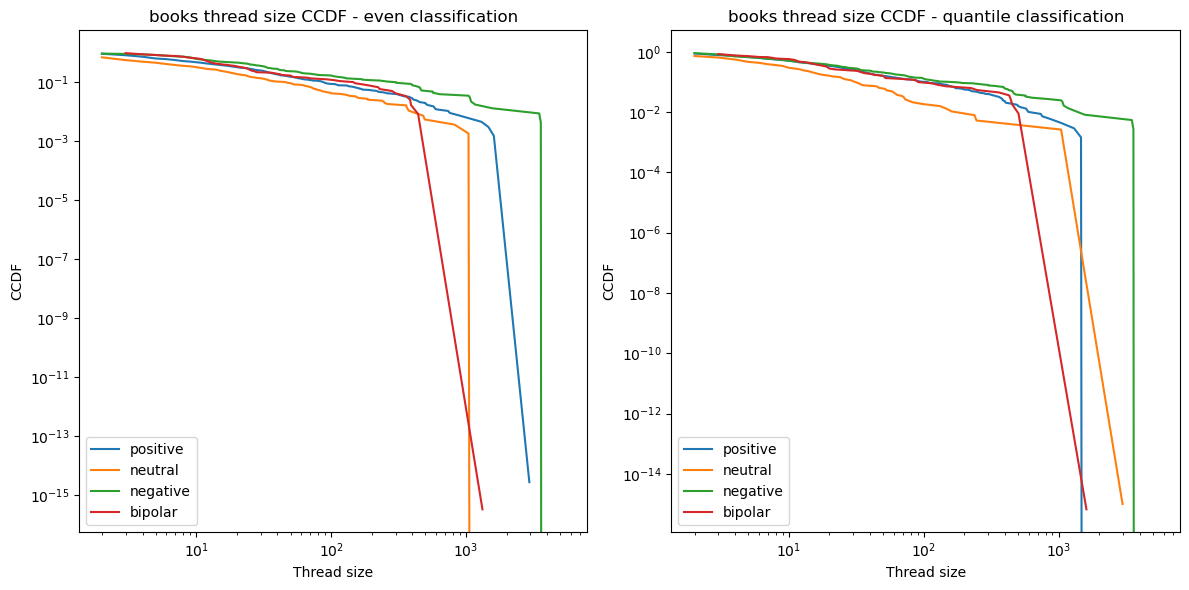

In [71]:
fig, axes = plt.subplots(1,2, figsize=(12,6))

i = 0
for type in grouped_counts:
    for key in grouped_counts[type]:
        axes[i].plot(grouped_counts[type][key].thread_size, grouped_counts[type][key].ccdf, label=key, )
    axes[i].set_xlabel('Thread size')
    axes[i].set_ylabel('CCDF')
    axes[i].set_title(f'books thread size CCDF - {type} classification')
    axes[i].set_yscale('log')
    axes[i].set_xscale('log')
    axes[i].legend()
    i += 1
plt.tight_layout()
plt.show()

In [75]:
data_sizes = {}
for type in grouped_counts:
    data_sizes[type] = {}
    for key in grouped_counts[type]:
        data_sizes[type][key] = len(classified_threads[classified_threads[type] == key])

In [76]:
pd.DataFrame.from_dict(data_sizes)

,even,quantile
positive,660,694
neutral,549,382
negative,229,369
bipolar,119,112
